In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_name_sparse = os.path.join("csv","Sparse","result_sparse.csv")
file_name_uniform = os.path.join("csv","Uniform","result_uniform.csv")


In [13]:
# Load CSV file as pandas DataFrame
df_sparse = pd.read_csv(file_name_sparse)
df_uniform = pd.read_csv(file_name_uniform)


# frames = [df1, df_200]
# df = pd.concat(frames)

In [14]:
df_uniform

,FD graph,TPR Sensitivity,TNR Specificity,PPV Precision,NPV Negative Precision
0,../../../Data/jpg/jpg_fd_files/Uniform/FR/n=20...,0.689189,0.452381,0.425000,0.712500
1,../../../Data/jpg/jpg_fd_files/Uniform/KK/n=20...,0.727273,0.448276,0.333333,0.812500
2,../../../Data/jpg/jpg_fd_files/Uniform/FA2/n=2...,0.614907,0.461538,0.825000,0.225000
3,../../../Data/jpg/jpg_fd_files/Uniform/JIGGLE/...,0.611842,0.437500,0.775000,0.262500
4,../../../Data/jpg/jpg_fd_files/Uniform/FR/n=20...,0.541176,0.808696,0.676471,0.704545
...,...,...,...,...,...
95,../../../Data/jpg/jpg_fd_files/Uniform/JIGGLE/...,0.140228,0.993007,0.924855,0.652989
96,../../../Data/jpg/jpg_fd_files/Uniform/FR/n=30...,0.071466,0.998177,0.985507,0.382600
97,../../../Data/jpg/jpg_fd_files/Uniform/KK/n=30...,0.334247,0.993928,0.884058,0.915094
98,../../../Data/jpg/jpg_fd_files/Uniform/FA2/n=3...,0.095378,0.995113,0.942029,0.569182


In [15]:
def df_split(df):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'TPR_Sensitivity', 'TNR_Specificity','PPV_Precision', 'NPV_Negative_Precision'])
    for filename in df['FD graph']:
        new_name = filename.replace("../../../Data/jpg/jpg_fd_files/","")
        name_list = new_name.split('/')
        prop_list = name_list[-1].split('=')
        node_number = prop_list[1].replace('d','')
        if "_" in prop_list[2]:
            degree = prop_list[2].split("_")[0]
        else:
            degree = prop_list[2].replace(".jpg","")
        tpr = df.loc[df['FD graph'] == filename, 'TPR Sensitivity'].values[0]
        tnr = df.loc[df['FD graph'] == filename, 'TNR Specificity'].values[0]
        ppv = df.loc[df['FD graph'] == filename, 'PPV Precision'].values[0]
        npv = df.loc[df['FD graph'] == filename, 'NPV Negative Precision'].values[0]
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, tpr, tnr, ppv, npv]
    return df_result



In [16]:
df_sparse_splitted = df_split(df_sparse)
df_uniform_splitted = df_split(df_uniform)


In [17]:
df_uniform_splitted

,Type,FD_Algorithm,Nodes_Number,Degree,TPR_Sensitivity,TNR_Specificity,PPV_Precision,NPV_Negative_Precision
0,Uniform,FR,200,6,0.689189,0.452381,0.425000,0.712500
1,Uniform,KK,200,6,0.727273,0.448276,0.333333,0.812500
2,Uniform,FA2,200,6,0.614907,0.461538,0.825000,0.225000
3,Uniform,JIGGLE,200,6,0.611842,0.437500,0.775000,0.262500
4,Uniform,FR,200,8,0.541176,0.808696,0.676471,0.704545
...,...,...,...,...,...,...,...,...
95,Uniform,JIGGLE,3000,12,0.140228,0.993007,0.924855,0.652989
96,Uniform,FR,3000,15,0.071466,0.998177,0.985507,0.382600
97,Uniform,KK,3000,15,0.334247,0.993928,0.884058,0.915094
98,Uniform,FA2,3000,15,0.095378,0.995113,0.942029,0.569182


In [18]:
def drawSensitivityGraphWithSameDegree(_type, _degree, df_result):
    temp = df_result.loc\
            [(df_result['Degree'] == str(_degree)), \
             ['Type', 'FD_Algorithm', 'Nodes_Number', 'TPR_Sensitivity']]
    print(temp)
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    fr_list = []
    fa2_list = []
    kk_list = []
    jiggle_list = []
    for num in nodes_number_list:
        fr_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FR'), 'TPR_Sensitivity'].values[0])
        fa2_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FA2'), 'TPR_Sensitivity'].values[0])
        kk_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'KK'), 'TPR_Sensitivity'].values[0])
        jiggle_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'JIGGLE'), 'TPR_Sensitivity'].values[0])
        
    y1 = fr_list
    y2 = fa2_list
    y3 = kk_list
    y4 = jiggle_list
    # Plot the curves
    plt.plot(nodes_number_list, y1, label='FR')
    plt.plot(nodes_number_list, y2, label='FA2')
    plt.plot(nodes_number_list, y3, label='KK')
    plt.plot(nodes_number_list, y4, label='JIGGLE')
    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Type=' + str(_type) + ' D=' + str(_degree))
    plt.legend()
    fname = "Type="+_type+"_d="+str(_degree)+"_Sensitivity.pdf"

    plt.savefig(os.path.join("graphs",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

In [19]:
def drawSpecificityGraphWithSameDegree(_type, _degree, df_result):
    temp = df_result.loc\
            [(df_result['Degree'] == str(_degree)), \
             ['Type', 'FD_Algorithm', 'Nodes_Number', 'TNR_Specificity']]
    print(temp)
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    fr_list = []
    fa2_list = []
    kk_list = []
    jiggle_list = []
    for num in nodes_number_list:
        fr_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FR'), 'TNR_Specificity'].values[0])
        fa2_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'FA2'), 'TNR_Specificity'].values[0])
        kk_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'KK'), 'TNR_Specificity'].values[0])
        jiggle_list.append(temp.loc[(temp['Nodes_Number'] == str(num)) & (temp['Type'] == _type) & (temp['FD_Algorithm'] == 'JIGGLE'), 'TNR_Specificity'].values[0])
        
    y1 = fr_list
    y2 = fa2_list
    y3 = kk_list
    y4 = jiggle_list
    # Plot the curves
    plt.plot(nodes_number_list, y1, label='FR')
    plt.plot(nodes_number_list, y2, label='FA2')
    plt.plot(nodes_number_list, y3, label='KK')
    plt.plot(nodes_number_list, y4, label='JIGGLE')
    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Type=' + str(_type) + ' D=' + str(_degree))
    plt.legend()
    fname = "Type="+_type+"_d="+str(_degree)+"_Specificity.pdf"

    plt.savefig(os.path.join("graphs/Specificity",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

      Type FD_Algorithm Nodes_Number  TNR_Specificity
0   Sparse           FR          200         0.423077
1   Sparse           KK          200         0.409091
2   Sparse          FA2          200         0.343750
3   Sparse       JIGGLE          200         0.409091
20  Sparse           FR          500         0.115385
21  Sparse           KK          500         0.272727
22  Sparse          FA2          500         0.386364
23  Sparse       JIGGLE          500         0.350000
40  Sparse           FR         1000         0.285714
41  Sparse           KK         1000         0.231707
42  Sparse          FA2         1000         0.285714
43  Sparse       JIGGLE         1000         0.400000
60  Sparse           FR         2000         0.275204
61  Sparse           KK         2000         0.328225
62  Sparse          FA2         2000         0.325779
63  Sparse       JIGGLE         2000         0.330396
80  Sparse           FR         3000         0.265802
81  Sparse           KK     

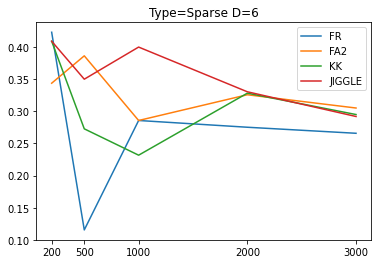

      Type FD_Algorithm Nodes_Number  TNR_Specificity
4   Sparse           FR          200         0.615385
5   Sparse           KK          200         0.622807
6   Sparse          FA2          200         0.666667
7   Sparse       JIGGLE          200         0.666667
24  Sparse           FR          500         0.602151
25  Sparse           KK          500         0.503876
26  Sparse          FA2          500         0.620253
27  Sparse       JIGGLE          500         0.662791
44  Sparse           FR         1000         0.483871
45  Sparse           KK         1000         0.555911
46  Sparse          FA2         1000         0.559006
47  Sparse       JIGGLE         1000         0.551515
64  Sparse           FR         2000         0.491765
65  Sparse           KK         2000         0.508613
66  Sparse          FA2         2000         0.540816
67  Sparse       JIGGLE         2000         0.596154
84  Sparse           FR         3000         0.513361
85  Sparse           KK     

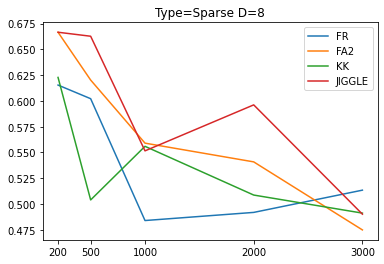

      Type FD_Algorithm Nodes_Number  TNR_Specificity
8   Sparse           FR          200         0.783333
9   Sparse           KK          200         0.755396
10  Sparse          FA2          200         0.785714
11  Sparse       JIGGLE          200         0.868421
28  Sparse           FR          500         0.733945
29  Sparse           KK          500         0.716049
30  Sparse          FA2          500         0.719626
31  Sparse       JIGGLE          500         0.757812
48  Sparse           FR         1000         0.697581
49  Sparse           KK         1000         0.678689
50  Sparse          FA2         1000         0.679012
51  Sparse       JIGGLE         1000         0.649770
68  Sparse           FR         2000         0.650624
69  Sparse           KK         2000         0.654668
70  Sparse          FA2         2000         0.709602
71  Sparse       JIGGLE         2000         0.632391
88  Sparse           FR         3000         0.638344
89  Sparse           KK     

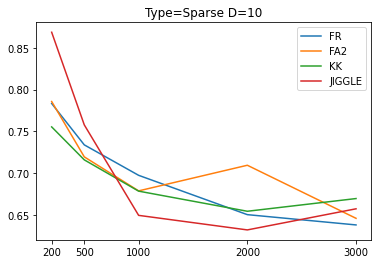

      Type FD_Algorithm Nodes_Number  TNR_Specificity
12  Sparse           FR          200         0.798165
13  Sparse           KK          200         0.815385
14  Sparse          FA2          200         0.800000
15  Sparse       JIGGLE          200         0.822222
32  Sparse           FR          500         0.832061
33  Sparse           KK          500         0.800000
34  Sparse          FA2          500         0.808000
35  Sparse       JIGGLE          500         0.772727
52  Sparse           FR         1000         0.868085
53  Sparse           KK         1000         0.812308
54  Sparse          FA2         1000         0.822368
55  Sparse       JIGGLE         1000         0.814103
72  Sparse           FR         2000         0.795591
73  Sparse           KK         2000         0.799760
74  Sparse          FA2         2000         0.823913
75  Sparse       JIGGLE         2000         0.788136
92  Sparse           FR         3000         0.782563
93  Sparse           KK     

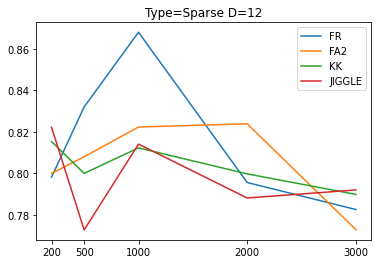

      Type FD_Algorithm Nodes_Number  TNR_Specificity
16  Sparse           FR          200         0.950413
17  Sparse           KK          200         0.990099
18  Sparse          FA2          200         0.950617
19  Sparse       JIGGLE          200         1.000000
36  Sparse           FR          500         0.927461
37  Sparse           KK          500         0.912037
38  Sparse          FA2          500         0.934783
39  Sparse       JIGGLE          500         0.902857
56  Sparse           FR         1000         0.906452
57  Sparse           KK         1000         0.838196
58  Sparse          FA2         1000         0.842593
59  Sparse       JIGGLE         1000         0.901235
76  Sparse           FR         2000         0.911594
77  Sparse           KK         2000         0.922907
78  Sparse          FA2         2000         0.896422
79  Sparse       JIGGLE         2000         0.918886
96  Sparse           FR         3000         0.888293
97  Sparse           KK     

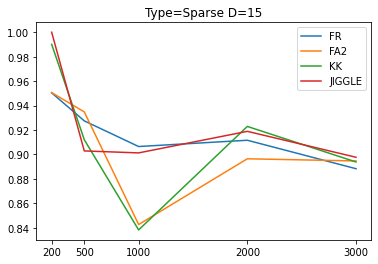

       Type FD_Algorithm Nodes_Number  TNR_Specificity
0   Uniform           FR          200         0.452381
1   Uniform           KK          200         0.448276
2   Uniform          FA2          200         0.461538
3   Uniform       JIGGLE          200         0.437500
20  Uniform           FR          500         0.440367
21  Uniform           KK          500         0.504000
22  Uniform          FA2          500         0.554054
23  Uniform       JIGGLE          500         0.500000
40  Uniform           FR         1000         0.440972
41  Uniform           KK         1000         0.504505
42  Uniform          FA2         1000         0.471311
43  Uniform       JIGGLE         1000         0.489655
60  Uniform           FR         2000         0.450549
61  Uniform           KK         2000         0.527233
62  Uniform          FA2         2000         0.480974
63  Uniform       JIGGLE         2000         0.489967
80  Uniform           FR         3000         0.422727
81  Unifor

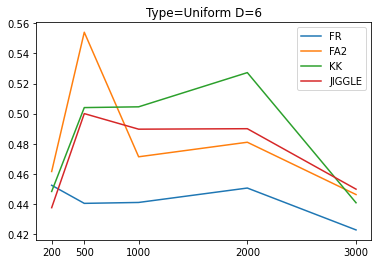

       Type FD_Algorithm Nodes_Number  TNR_Specificity
4   Uniform           FR          200         0.808696
5   Uniform           KK          200         0.784722
6   Uniform          FA2          200         0.634921
7   Uniform       JIGGLE          200         0.852941
24  Uniform           FR          500         0.796020
25  Uniform           KK          500         0.827160
26  Uniform          FA2          500         0.842105
27  Uniform       JIGGLE          500         0.815789
44  Uniform           FR         1000         0.785075
45  Uniform           KK         1000         0.810559
46  Uniform          FA2         1000         0.811688
47  Uniform       JIGGLE         1000         0.779279
64  Uniform           FR         2000         0.780368
65  Uniform           KK         2000         0.815087
66  Uniform          FA2         2000         0.825478
67  Uniform       JIGGLE         2000         0.811839
84  Uniform           FR         3000         0.801731
85  Unifor

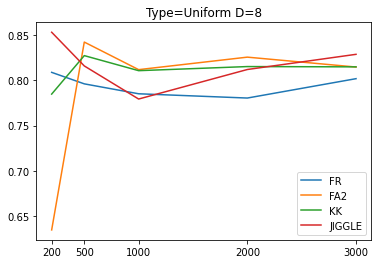

       Type FD_Algorithm Nodes_Number  TNR_Specificity
8   Uniform           FR          200         0.914894
9   Uniform           KK          200         0.887755
10  Uniform          FA2          200         0.841270
11  Uniform       JIGGLE          200         0.879310
28  Uniform           FR          500         0.971660
29  Uniform           KK          500         0.962264
30  Uniform          FA2          500         0.990148
31  Uniform       JIGGLE          500         0.963115
48  Uniform           FR         1000         0.955729
49  Uniform           KK         1000         0.969290
50  Uniform          FA2         1000         0.981191
51  Uniform       JIGGLE         1000         0.979592
68  Uniform           FR         2000         0.958234
69  Uniform           KK         2000         0.966633
70  Uniform          FA2         2000         0.960739
71  Uniform       JIGGLE         2000         0.956466
88  Uniform           FR         3000         0.963685
89  Unifor

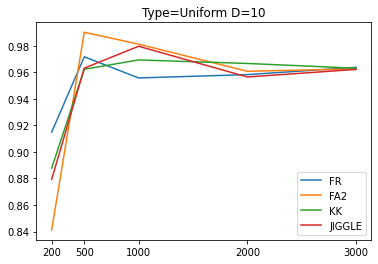

       Type FD_Algorithm Nodes_Number  TNR_Specificity
12  Uniform           FR          200         0.937500
13  Uniform           KK          200         0.952381
14  Uniform          FA2          200         0.927711
15  Uniform       JIGGLE          200         1.000000
32  Uniform           FR          500         0.988506
33  Uniform           KK          500         0.977041
34  Uniform          FA2          500         1.000000
35  Uniform       JIGGLE          500         0.989362
52  Uniform           FR         1000         0.980000
53  Uniform           KK         1000         0.984032
54  Uniform          FA2         1000         0.983707
55  Uniform       JIGGLE         1000         0.986900
72  Uniform           FR         2000         0.983184
73  Uniform           KK         2000         0.992718
74  Uniform          FA2         2000         0.982703
75  Uniform       JIGGLE         2000         0.991803
92  Uniform           FR         3000         0.991943
93  Unifor

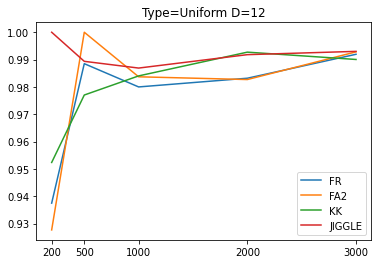

       Type FD_Algorithm Nodes_Number  TNR_Specificity
16  Uniform           FR          200         0.975410
17  Uniform           KK          200         0.991304
18  Uniform          FA2          200         0.975610
19  Uniform       JIGGLE          200         1.000000
36  Uniform           FR          500         0.959302
37  Uniform           KK          500         0.992000
38  Uniform          FA2          500         0.988604
39  Uniform       JIGGLE          500         0.987805
56  Uniform           FR         1000         0.997183
57  Uniform           KK         1000         0.994275
58  Uniform          FA2         1000         1.000000
59  Uniform       JIGGLE         1000         1.000000
76  Uniform           FR         2000         0.986767
77  Uniform           KK         2000         0.997665
78  Uniform          FA2         2000         0.995794
79  Uniform       JIGGLE         2000         0.996587
96  Uniform           FR         3000         0.998177
97  Unifor

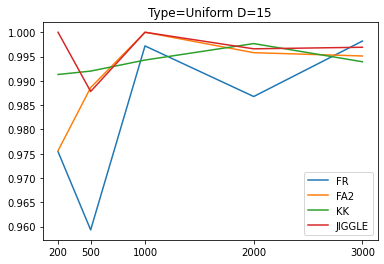

In [20]:
# drawSensitivityGraphWithSameDegree('Sparse', 6, df_sparse_splitted)
# drawSensitivityGraphWithSameDegree('Sparse', 8, df_sparse_splitted)
# drawSensitivityGraphWithSameDegree('Sparse', 10, df_sparse_splitted)
# drawSensitivityGraphWithSameDegree('Sparse', 12, df_sparse_splitted)
# drawSensitivityGraphWithSameDegree('Sparse', 15, df_sparse_splitted)
# drawSensitivityGraphWithSameDegree('Uniform', 6, df_uniform_splitted)
# drawSensitivityGraphWithSameDegree('Uniform', 8, df_uniform_splitted)
# drawSensitivityGraphWithSameDegree('Uniform', 10, df_uniform_splitted)
# drawSensitivityGraphWithSameDegree('Uniform', 12, df_uniform_splitted)
# drawSensitivityGraphWithSameDegree('Uniform', 15, df_uniform_splitted)

drawSpecificityGraphWithSameDegree('Sparse', 6, df_sparse_splitted)
drawSpecificityGraphWithSameDegree('Sparse', 8, df_sparse_splitted)
drawSpecificityGraphWithSameDegree('Sparse', 10, df_sparse_splitted)
drawSpecificityGraphWithSameDegree('Sparse', 12, df_sparse_splitted)
drawSpecificityGraphWithSameDegree('Sparse', 15, df_sparse_splitted)
drawSpecificityGraphWithSameDegree('Uniform', 6, df_uniform_splitted)
drawSpecificityGraphWithSameDegree('Uniform', 8, df_uniform_splitted)
drawSpecificityGraphWithSameDegree('Uniform', 10, df_uniform_splitted)
drawSpecificityGraphWithSameDegree('Uniform', 12, df_uniform_splitted)
drawSpecificityGraphWithSameDegree('Uniform', 15, df_uniform_splitted)